In [1]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
filename = "monthdata.csv"
filepath = os.path.join("..","data",filename)

In [3]:
months = pd.read_csv(filepath,index_col=False, header=0)

In [4]:
series = pd.Series.from_csv(filepath, header=0)
#series = pd.read_csv(filepath, header=0)

len(series)

/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


565

In [7]:
filename = "monthprices.csv"
filepath = os.path.join("..","data",filename)
prices = pd.Series.from_csv(filepath, header=0)

/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


YYYYMM
197607    3.9
197608    3.7
197609    3.8
197610    3.9
197611    3.8
Name: Value, dtype: float64


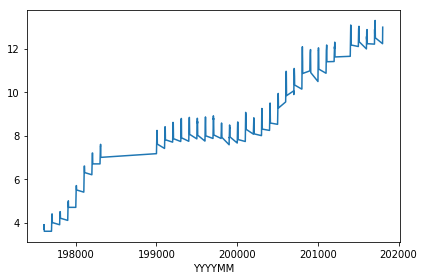

In [8]:
print(prices.head())
prices.plot()
# Save our graph 
plt.tight_layout()
plt.savefig("../images/priceserie.png")
plt.show()

YYYYMM
198401   -0.001
198402    0.001
198403    0.002
198404    0.003
198405    0.007
Name: Value, dtype: float64


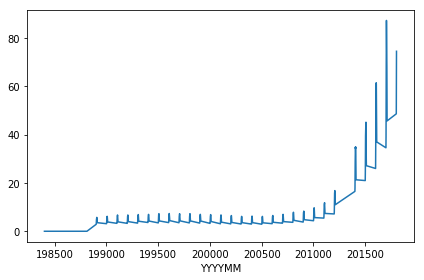

In [29]:
print(series.head())
series.plot()
# Save our graph 
plt.tight_layout()
plt.savefig("../images/timeserie.png")
plt.show()

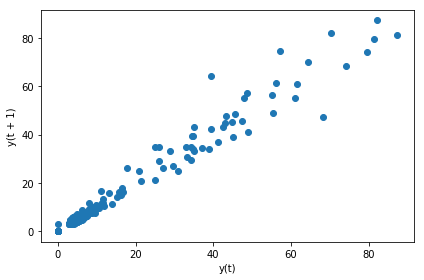

In [18]:
#from pandas.tools.plotting import lag_plot
from pandas.plotting import lag_plot
lag_plot(series)
# Save our graph 
plt.tight_layout()
plt.savefig("../images/lag_plot.png")
plt.show()

In [19]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.984519
t+1  0.984519  1.000000


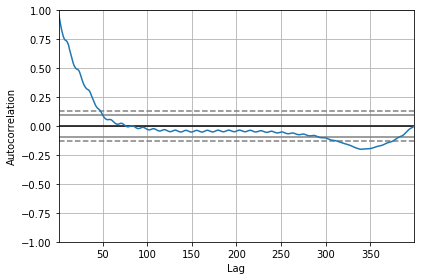

In [20]:
#from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
# Save our graph 
plt.tight_layout()
plt.savefig("../images/autocorr.png")
plt.show()

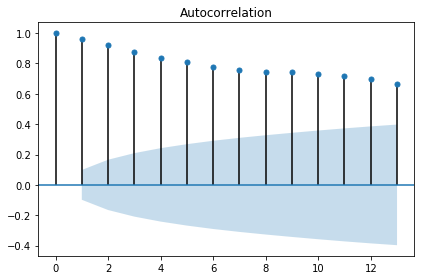

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=13)
# Save our graph 
plt.tight_layout()
plt.savefig("../images/acf.png")
plt.show()

Test MSE: 186.529


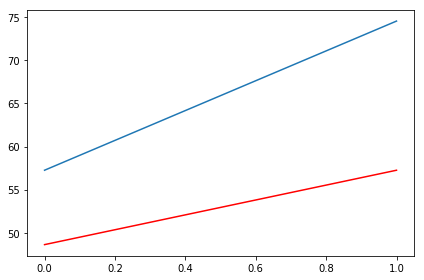

In [22]:
from sklearn.metrics import mean_squared_error
# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-2], X[len(X)-2:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
# Save our graph 
plt.tight_layout()
plt.savefig("../images/model_persistence.png")
plt.show()

Lag: 17
Coefficients: [-0.12710533  0.96790095  0.05244703 -0.06572644 -0.05983     0.12839691
 -0.37455664  0.36616223 -0.00984811 -0.22533645  0.26009462  0.00713946
  0.64791095 -0.24286908 -0.54277255 -0.08576425  0.31305603 -0.09485515]
predicted=72.581693, expected=70.208000
predicted=81.318765, expected=82.084000
predicted=86.662109, expected=87.309000
predicted=90.799419, expected=81.295000
predicted=92.455105, expected=79.435000
predicted=81.149079, expected=74.195000
predicted=72.951806, expected=68.260000
predicted=63.761040, expected=47.416000
predicted=54.696709, expected=45.697000
predicted=54.308149, expected=48.632000
predicted=59.521410, expected=57.253000
predicted=85.509370, expected=74.537000
Test MSE: 70.232


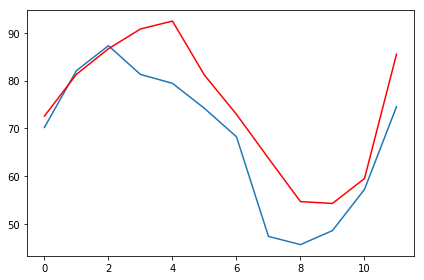

In [23]:
from statsmodels.tsa.ar_model import AR
# split dataset
X = series.values
train, test = X[1:len(X)-12], X[len(X)-12:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
# Save our graph 
plt.tight_layout()
plt.savefig("../images/ARmodel.png")
plt.show()

predicted=72.581693, expected=70.208000
predicted=79.021266, expected=82.084000
predicted=87.278288, expected=87.309000
predicted=91.621694, expected=81.295000
predicted=83.381418, expected=79.435000
predicted=67.655352, expected=74.195000
predicted=67.111405, expected=68.260000
predicted=59.206808, expected=47.416000
predicted=38.707260, expected=45.697000
predicted=48.116924, expected=48.632000
predicted=54.617998, expected=57.253000
predicted=81.950251, expected=74.537000
Test MSE: 35.947


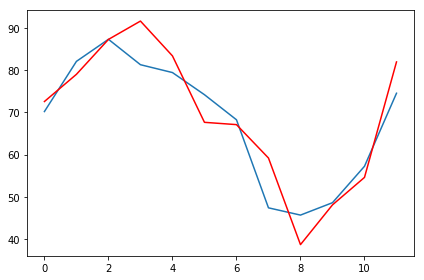

In [24]:
# split dataset
X = series.values
train, test = X[1:len(X)-12], X[len(X)-12:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
# Save our graph 
plt.tight_layout()
plt.savefig("../images/ARmodel_history.png")
plt.show()